In [4]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('Titanic_train.csv')  
test_df = pd.read_csv('Titanic_test.csv')  



In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.shape,test_df.shape

((891, 12), (418, 11))

In [2]:
# Check for missing values
print(train_df.isnull().sum())

# Optionally, check for missing values in the test dataset
print(test_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# Fill missing Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [7]:
# Drop Cabin column 70% is missing
train_df.drop(columns='Cabin', inplace=True)
test_df.drop(columns='Cabin', inplace=True)


In [8]:
# Fill missing 'Age' values by grouping by 'Pclass', 'Embarked', and 'Sex'
for dataset in [train_df, test_df]:
    dataset['Age'] = dataset.groupby(['Pclass', 'Embarked', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


In [9]:
# Drop columns that are not useful for the analysis/model
columns_to_drop = ['PassengerId', 'Name', 'Ticket']

train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)


In [12]:
import matplotlib.pylab  as plt
import seaborn as sns

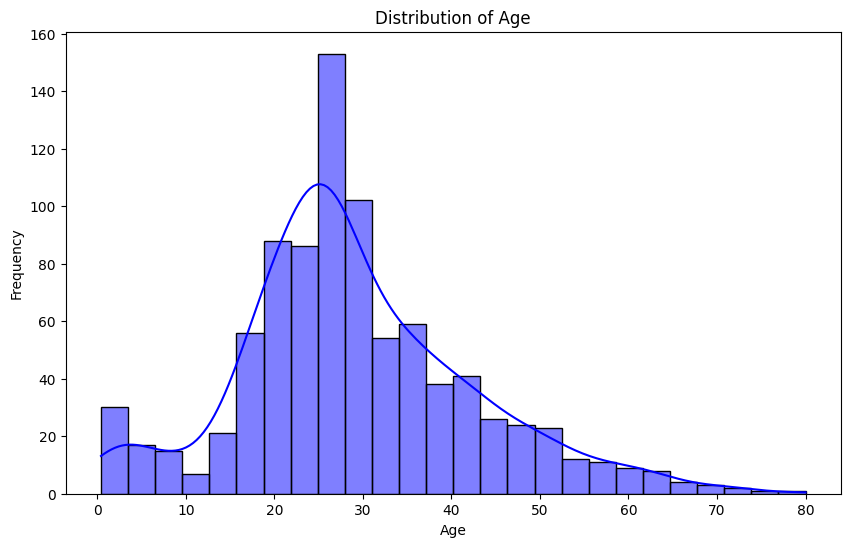

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


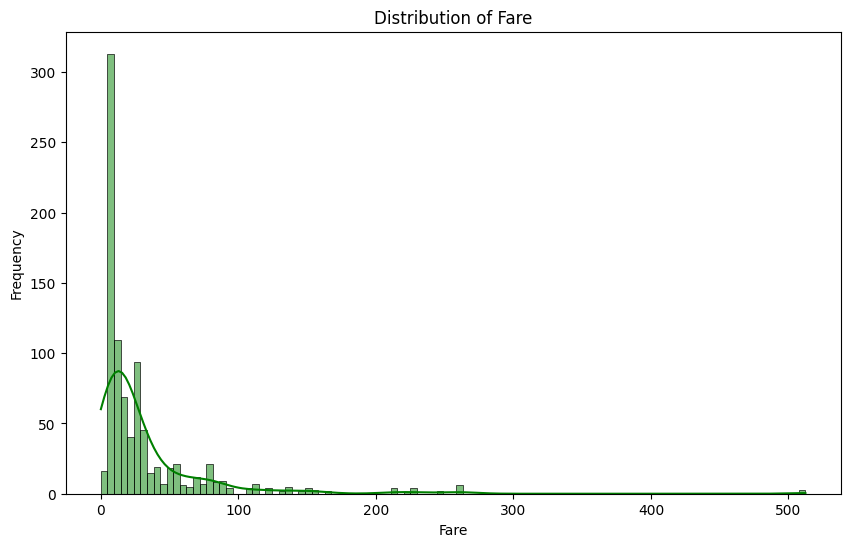

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], kde=True, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


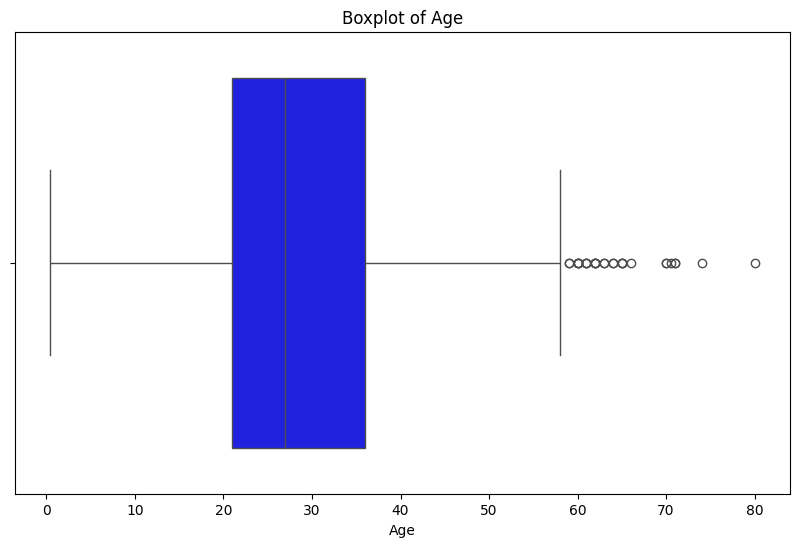

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Age'], color='blue')
plt.title('Boxplot of Age')
plt.show()


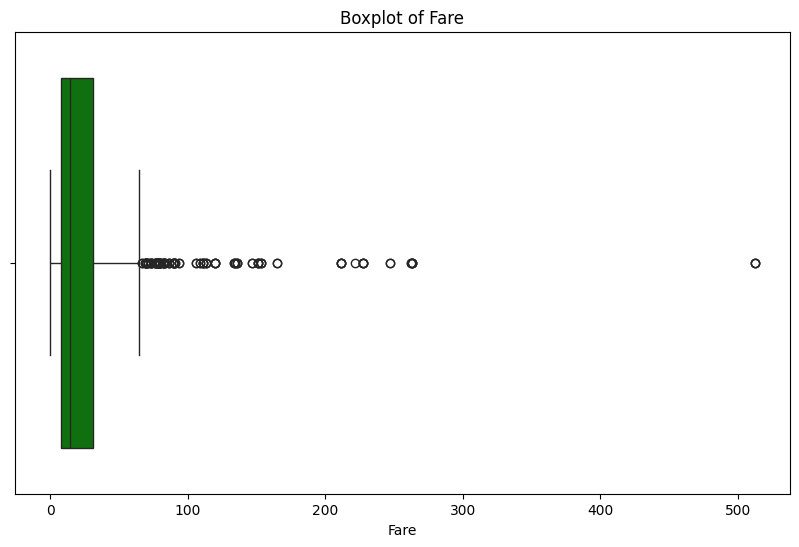

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Fare'], color='green')
plt.title('Boxplot of Fare')
plt.show()


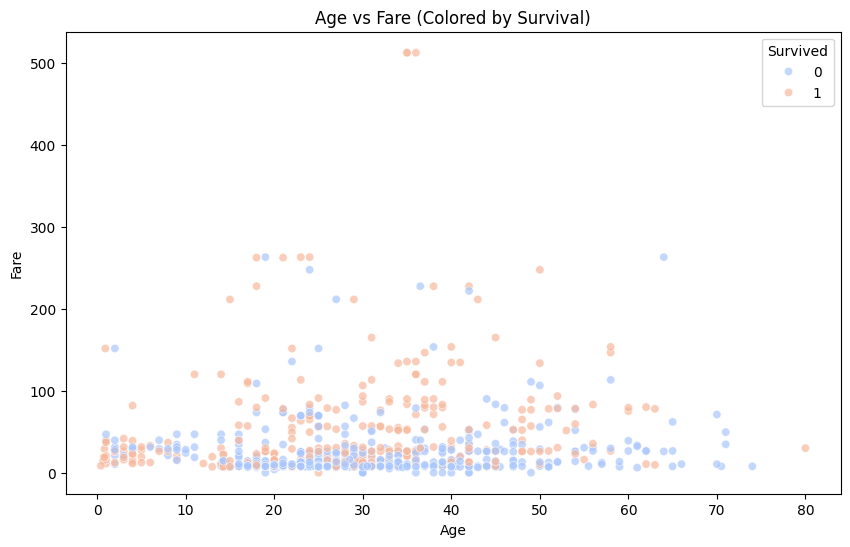

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('Age vs Fare (Colored by Survival)')
plt.show()


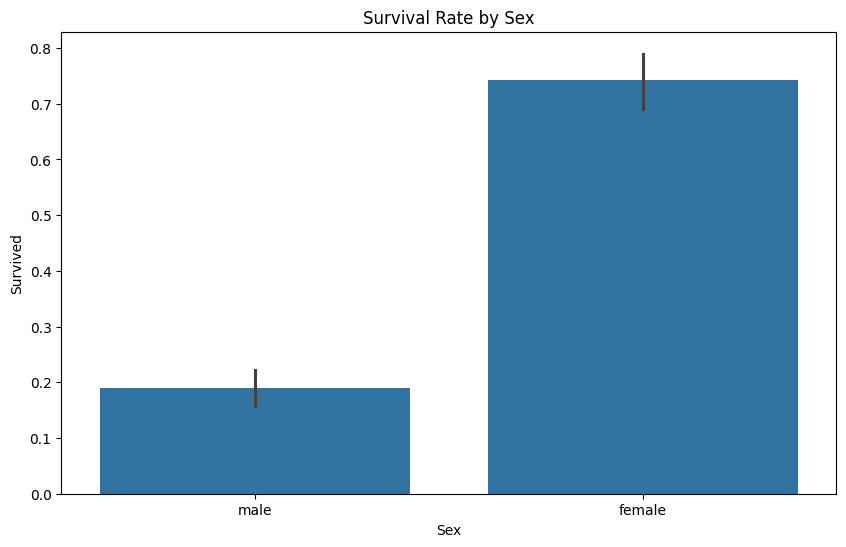

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()


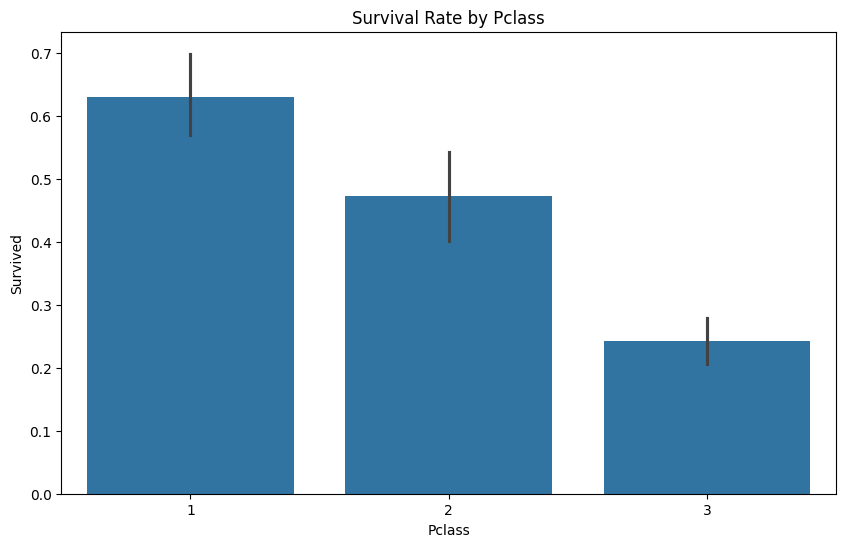

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()


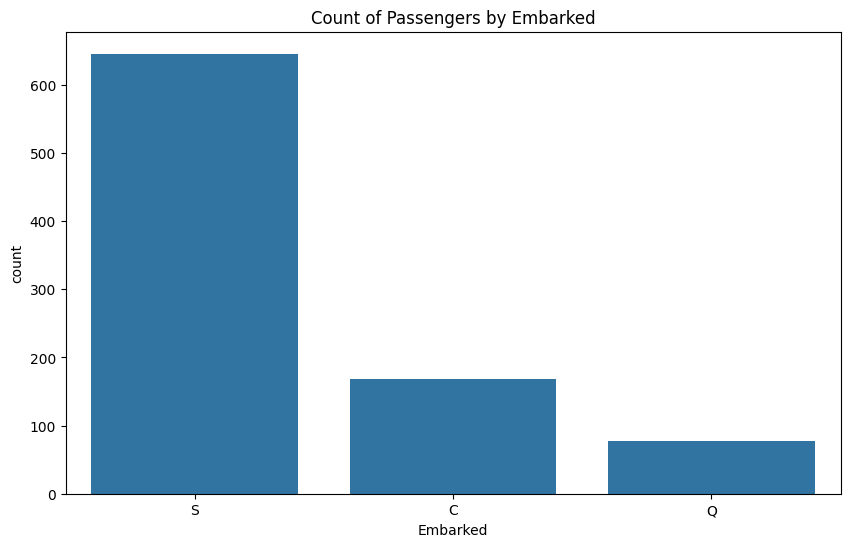

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=train_df)
plt.title('Count of Passengers by Embarked')
plt.show()


C:\Users\rites\AppData\Local\Temp\ipykernel_27240\3734652396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


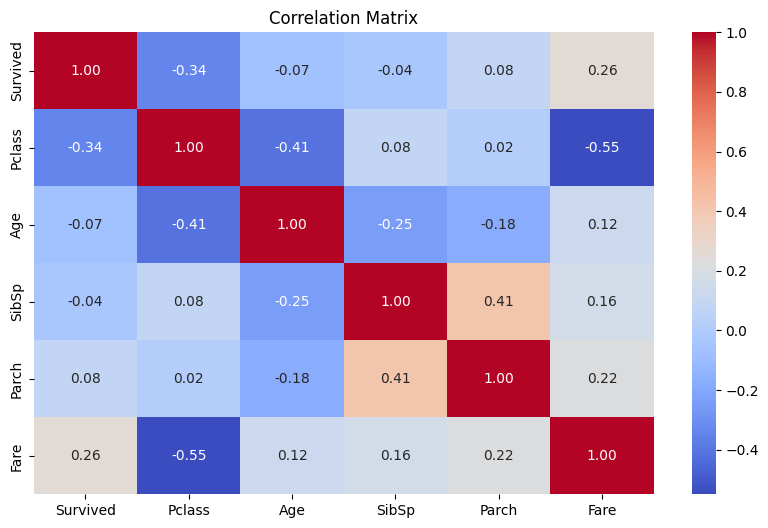

In [21]:
# Correlation heatmap
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [22]:
train_df = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex'], drop_first=True)

In [23]:
# Apply One-Hot Encoding to 'Embarked' column
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)


In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the 'Age' and 'Fare' columns
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])


In [25]:
# Feature engineering: Create 'FamilySize' feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1  # +1 to include the passenger themselves
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Drop 'SibSp' and 'Parch' after creating the new feature
train_df.drop(columns=['SibSp', 'Parch'], inplace=True)
test_df.drop(columns=['SibSp', 'Parch'], inplace=True)


,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,3,0.401830,-0.490783,1,1,0,1
1,3,1.337598,-0.507479,0,0,1,2
2,2,2.460520,-0.453367,1,1,0,1
3,3,-0.159630,-0.474005,1,0,1,1
4,3,-0.533938,-0.401017,0,0,1,3
...,...,...,...,...,...,...,...
413,3,-0.346784,-0.486337,1,0,1,1
414,1,0.738707,1.544246,0,0,0,1
415,3,0.701276,-0.502445,1,0,1,1
416,3,-0.346784,-0.486337,1,0,1,1


In [29]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X_train = train_df.drop(columns=['Survived'])  # Features
y_train = train_df['Survived']  # Target variable
X_test = test_df.drop(columns=['Survived'],errors='ignore')  # Features for test set


# Split the data into train and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [30]:
from sklearn.metrics import classification_report, accuracy_score

# Example: evaluating model on validation data
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))


In [31]:
import lightgbm as lgb

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Train the model on the training set
lgb_model.fit(X_train, y_train)

# Evaluate the model
print("LightGBM Model Evaluation:")
evaluate_model(lgb_model, X_val, y_val)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [32]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Evaluate the model
print("XGBoost Model Evaluation:")
evaluate_model(xgb_model, X_val, y_val)


XGBoost Model Evaluation:
Accuracy: 0.8379888268156425
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [33]:
from sklearn.model_selection import cross_val_score

# Cross-validation for LightGBM
lgb_cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("LightGBM Cross-Validation Accuracy: ", lgb_cv_scores.mean())

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy: ", xgb_cv_scores.mean())


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [34]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
lgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(), lgb_param_grid, cv=5, scoring='accuracy')
lgb_grid_search.fit(X_train, y_train)

print("Best parameters for LightGBM:", lgb_grid_search.best_params_)
print("Best cross-validation score for LightGBM:", lgb_grid_search.best_score_)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation score for XGBoost:", xgb_grid_search.best_score_)


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Analysis and Interpretation:

Accuracy:

XGBoost slightly outperforms LightGBM with an accuracy of 0.84 compared to 0.83.

Both models are quite close in terms of overall accuracy, but XGBoost shows a marginal edge.

Precision, Recall, and F1-Score:

Both models perform similarly in terms of precision, recall, and F1-score for both classes (Survived = 0 and Survived = 1).

Class 0 (no survival) is predicted with higher precision and recall than Class 1 (survival). This is common in imbalanced datasets, where the model is more focused on correctly predicting the majority class (non-survivors).

Class 1 (survival) has a slightly lower precision and recall, but this is typical in imbalanced classification problems.

Cross-Validation:

LightGBM has a slightly higher cross-validation score (0.84 vs. 0.84 for XGBoost) during hyperparameter tuning.

Both models perform similarly after tuning, with LightGBM having a slightly better consistency across the folds.

Best Hyperparameters:

For LightGBM, the best parameters are learning_rate: 0.1, max_depth: 3, and n_estimators: 50.

For XGBoost, the best parameters are learning_rate: 0.1, max_depth: 5, and n_estimators: 50.

XGBoost appears to benefit from a deeper tree (max_depth: 5), while LightGBM achieves its best performance with a shallower tree (max_depth: 3).

Practical Implications:

When to Use LightGBM:

LightGBM is particularly beneficial when:

The dataset is very large or contains many features.

You need faster training times.

You have memory constraints.

When to Use XGBoost:

XGBoost might be a better choice when:

Accuracy is a key focus, especially when the model needs to achieve the best possible performance.

You have a well-balanced dataset or after properly tuning hyperparameters for your data.

You are looking for more flexibility in model training and tuning.